Mochamad Reza Rahadi

In [1]:
!pip install beautifulsoup4 requests

In [2]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

# Mengambil Data dengan Beautiful Soup

Membuka finviz untuk mengambil informasi saham AAPL (Apple), bagian yang ingin diambil dari website adalah tabel yang diberi kotak merah pada gambar dibawah.

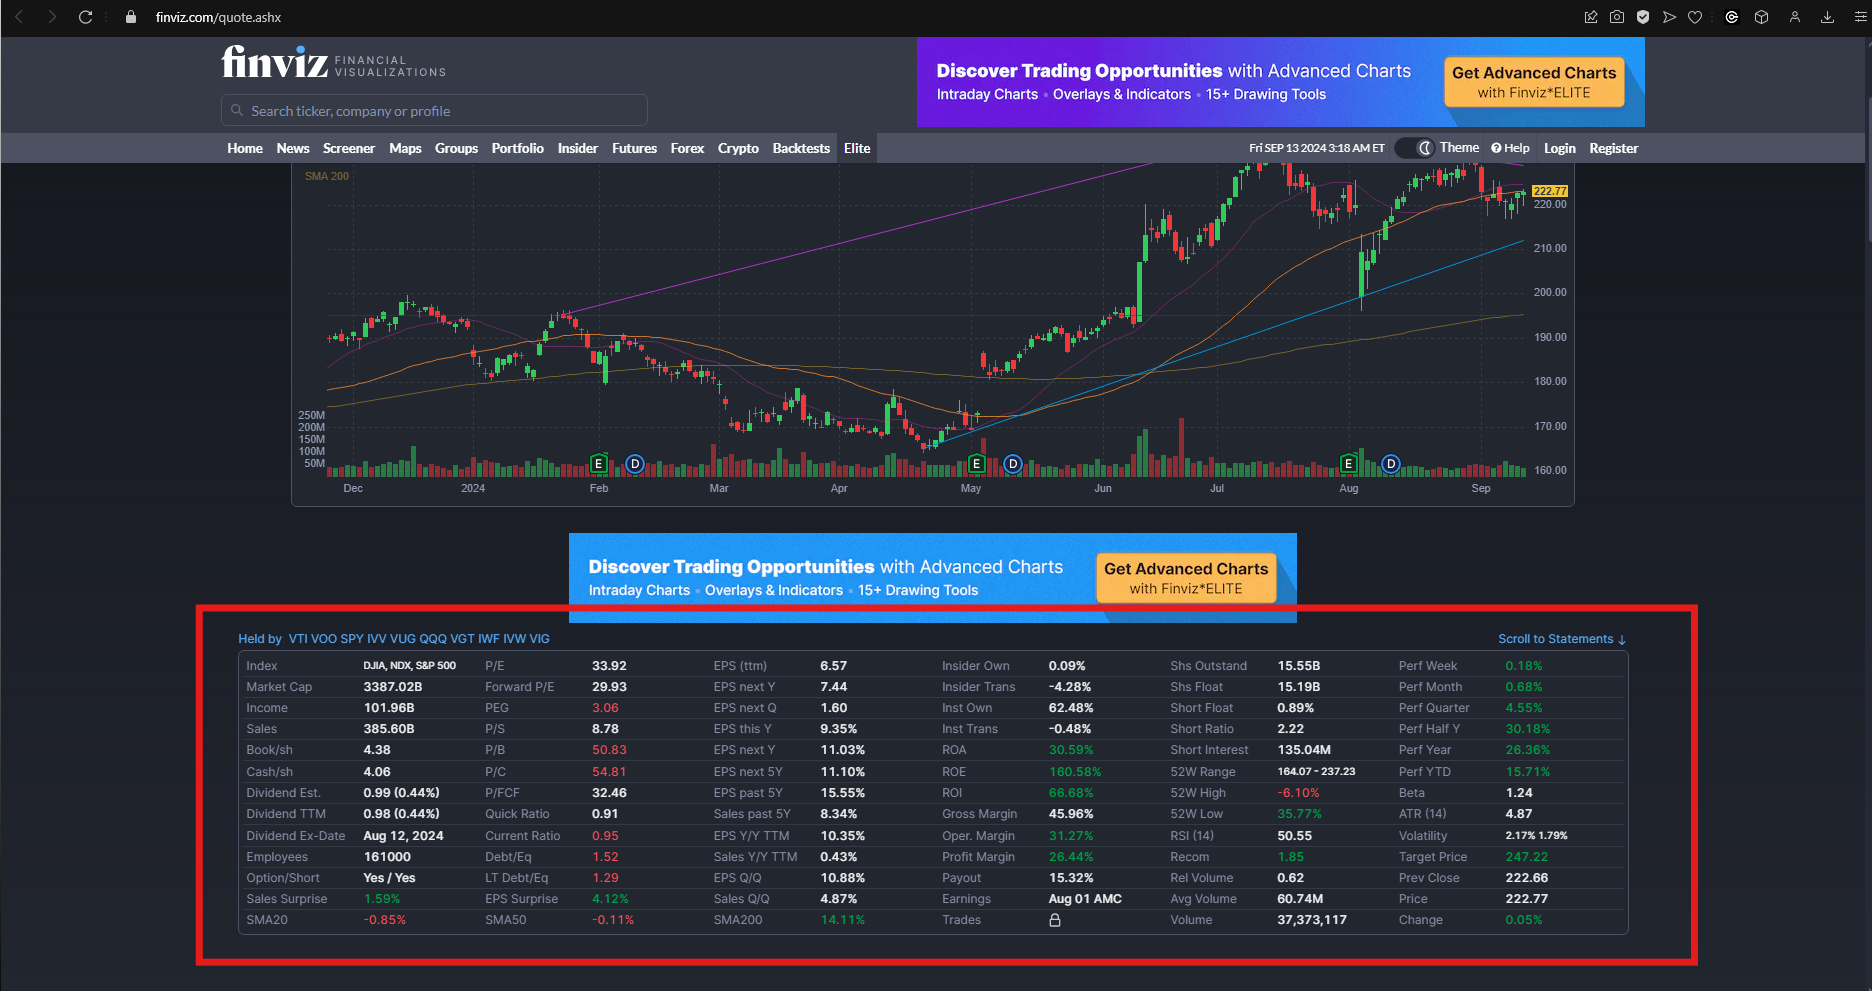

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL finviz
url = 'https://finviz.com/quote.ashx?t=AAPL'

# Header agar request tidak ditolak
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Mengirim permintaan GET ke URL beserta headernya
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Mencari semua elemen <tr> dengan kelas 'table-dark-row'
    rows = soup.find_all('tr', class_='table-dark-row')

    # Menyiapkan Dictionary untuk menyimpan data, karena tipe data yang diambil key dan valuenya
    data_dict = {}

    for row in rows:
        # Mengambil semua <td> dalam <tr> untuk informasi
        columns = row.find_all('td')

        # Menyimpan data dalam format key and value
        for i in range(0, len(columns), 2):
            key = columns[i].text.strip()
            value = columns[i + 1].text.strip()
            data_dict[key] = value

    # Membuat DataFrame dari dictionary agar lebih rapih dan bisa disimpan ke csv
    df = pd.DataFrame(list(data_dict.items()), columns=['Metric', 'Value'])
    df.to_csv('AAPL_data.csv', index=False)

    print(df)
else:
    print(f'Gagal mengakses. Status code: {response.status_code}')


          Metric               Value
0          Index  DJIA, NDX, S&P 500
1            P/E               33.88
2      EPS (ttm)                6.57
3    Insider Own               0.09%
4   Shs Outstand              15.55B
..           ...                 ...
72         SMA50              -0.26%
73        SMA200              13.88%
74        Trades                    
75        Volume          36,657,899
76        Change              -0.12%

[77 rows x 2 columns]


# Mengambil Data API Menggunakan GraphQL

Mengambil API yang disediakan oleh countries.trevorblades yang berisikan kumpulan informasi umum suatu negara, seperti mata uang, bahasa yang digunakan, ibukota dan lain lain.

In [5]:
import requests
import json

# URL endpoint Countries GraphQL
url = 'https://countries.trevorblades.com/'

# Definisikan query GraphQL
query = '''
{
  countries {
    name
    capital
    currency
  }
}
'''

# Kirim request POST dengan query yang telah di declare sebelumnya.
response = requests.post(url, json={'query': query})

# Ambil data dari response
data = response.json()

# Tampilkan hasil
print(json.dumps(data, indent=2))

# Simpan hasil ke dalam file .json
with open('countries_data.json', 'w') as json_file:
    json.dump(data, json_file, indent=2)


{
  "data": {
    "countries": [
      {
        "name": "Andorra",
        "capital": "Andorra la Vella",
        "currency": "EUR"
      },
      {
        "name": "United Arab Emirates",
        "capital": "Abu Dhabi",
        "currency": "AED"
      },
      {
        "name": "Afghanistan",
        "capital": "Kabul",
        "currency": "AFN"
      },
      {
        "name": "Antigua and Barbuda",
        "capital": "Saint John's",
        "currency": "XCD"
      },
      {
        "name": "Anguilla",
        "capital": "The Valley",
        "currency": "XCD"
      },
      {
        "name": "Albania",
        "capital": "Tirana",
        "currency": "ALL"
      },
      {
        "name": "Armenia",
        "capital": "Yerevan",
        "currency": "AMD"
      },
      {
        "name": "Angola",
        "capital": "Luanda",
        "currency": "AOA"
      },
      {
        "name": "Antarctica",
        "capital": null,
        "currency": null
      },
      {
        "name": "A